In [1]:
using Symbolics

@variables λ
@variables (x(λ))[1:2]
@variables g11(x[1], x[2]) g12(x[1], x[2]) g22(x[1], x[2])


3-element Vector{Num}:
 g11((x(λ))[1], (x(λ))[2])
 g12((x(λ))[1], (x(λ))[2])
 g22((x(λ))[1], (x(λ))[2])

In [2]:
g = [g11 g12; g12 g22]
g_inv = inv(g)

2×2 Matrix{Num}:
    g22((x(λ))[1], (x(λ))[2]) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))  …  (-g12((x(λ))[1], (x(λ))[2])) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))
 (-g12((x(λ))[1], (x(λ))[2])) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))        g11((x(λ))[1], (x(λ))[2]) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))

In [3]:
Γ = Dict()

for i in 1:2, j in 1:2, k in 1:2
    Γ_ijk = (1//2) * sum(
        g_inv[i, l] * (
            Differential(x[k])(g[l, j]) +
            Differential(x[j])(g[l, k]) -
            Differential(x[l])(g[j, k])
        ) for l in 1:2
    )
    Γ[(i, j, k)] = simplify(Γ_ijk)
end


In [4]:
Γ[1,2,1]

((1//2)*(-Differential((x(λ))[1])(g22((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + g22((x(λ))[1], (x(λ))[2])*Differential((x(λ))[2])(g11((x(λ))[1], (x(λ))[2])))) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))

In [5]:
dxdλ = Dict();
d2xdλ = Dict();

dxdλ[1] = Differential(λ)(x[1]);
dxdλ[2] = Differential(λ)(x[2]);
d2xdλ[1] = Differential(λ)(dxdλ[1]);
d2xdλ[2] = Differential(λ)(dxdλ[2]);

In [6]:
geodesic_eq = Dict()
for i in 1:2
  geodesic_eq[i] = d2xdλ[i] + sum(Γ[(i, j, k)] * dxdλ[j] * dxdλ[k] for j in 1:2, k in 1:2) ~ 0
end

In [7]:
geodesic_eq[1]

((1//2)*(Differential(λ)((x(λ))[1])^2)*(-(2//1)*Differential((x(λ))[1])(g12((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + g22((x(λ))[1], (x(λ))[2])*Differential((x(λ))[1])(g11((x(λ))[1], (x(λ))[2])) + g12((x(λ))[1], (x(λ))[2])*Differential((x(λ))[2])(g11((x(λ))[1], (x(λ))[2])))) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2)) + ((1//2)*(Differential(λ)((x(λ))[2])^2)*(-Differential((x(λ))[1])(g22((x(λ))[1], (x(λ))[2]))*g22((x(λ))[1], (x(λ))[2]) - Differential((x(λ))[2])(g22((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + (2//1)*Differential((x(λ))[2])(g12((x(λ))[1], (x(λ))[2]))*g22((x(λ))[1], (x(λ))[2]))) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2)) + (Differential(λ)((x(λ))[2])*(-Differential((x(λ))[1])(g22((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + g22((x(λ))[1], (x(λ))[2])*Differential((x(λ))[2])(g11((x(λ))[1], (x(λ))[2])))*Differential(λ)((x(λ))[1])) / (g11((x(λ))[1], (x(λ))[2])*g22((x

In [8]:
expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1, g12 => 0, g22 => 1))))

Differential(λ)(Differential(λ)((x(λ))[1])) ~ 0

In [9]:
expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1, g12 => 0, g22 => 1))))

Differential(λ)(Differential(λ)((x(λ))[2])) ~ 0

In [10]:
for i in 1:2, j in 1:2, k in 1:2
  zz = simplify(expand_derivatives(substitute(Γ[(i, j, k)], Dict(g11 => 1, g12 => 0, g22 => 1))))
  println("(", i, j, k, ") ", zz)
end

(111) 0//1
(112) 0//1
(121) 0//1
(122) 0//1
(211) 0//1
(212) 0//1
(221) 0//1
(222) 0//1


In [11]:
for i in 1:2, j in 1:2, k in 1:2
  zz = simplify(expand_derivatives(substitute(Γ[(i, j, k)], Dict(g11 => 1, g12 => 0, g22 => sin(x[1])*sin(x[1])))))
  println("(", i, j, k, ") ", zz)
end

(111) 0//1
(112) 0//1
(121) 0//1
(122) (-1//2)*sin(2(x(λ))[1])
(211) 0//1
(212) cos((x(λ))[1]) / sin((x(λ))[1])
(221) cos((x(λ))[1]) / sin((x(λ))[1])
(222) 0//1


In [19]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1, g12 => 0, g22 => sin(x[1])*sin(x[1])))))

Differential(λ)(Differential(λ)((x(λ))[1])) - (Differential(λ)((x(λ))[2])^2)*sin((x(λ))[1])*cos((x(λ))[1]) ~ 0

In [20]:
eq2 = expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1, g12 => 0, g22 => sin(x[1])*sin(x[1])))))

((sin((x(λ))[1])^2)*Differential(λ)(Differential(λ)((x(λ))[2])) + 2Differential(λ)((x(λ))[2])*Differential(λ)((x(λ))[1])*sin((x(λ))[1])*cos((x(λ))[1])) / (sin((x(λ))[1])^2) ~ 0

In [18]:
eq[1]

LoadError: MethodError: no method matching getindex(::Equation, ::Int64)

In [48]:
using DifferentialEquations

function f(du, u, p, t)
    du[1] = u[3]        # du/dt = v
    du[2] = u[4]       # dv/dt = -u
    du[3] = u[4] * sin(u[1]) * cos(u[1])
    du[4] = - 2 * u[3] * u[4] * cos(u[1]) / sin(u[1])
end

u0 = [0.01, 0.01, 0.01, 0.01]         # 初期値
tspan = (0.0, 10.0)

prob = ODEProblem(f, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
  0.0
  0.08112834674795151
  0.23353546976436979
  0.434913931934129
  0.7081556886008231
  1.0670251492157539
  1.542086085120319
  2.166270518626874
  2.990952246856431
  4.08266438258908
  5.537208442001157
  7.4858880412864455
 10.0
u: 13-element Vector{Vector{Float64}}:
 [0.01, 0.01, 0.01, 0.01]
 [0.010811603979177468, 0.010750391782393783, 0.010007799907036647, 0.008555042801497978]
 [0.012337890864484917, 0.01189298474885586, 0.010020985406447701, 0.0065694002069281165]
 [0.014357461852196609, 0.013029883962045718, 0.010036100325399522, 0.004851321413297891]
 [0.017102191958223188, 0.014142794625105756, 0.010053513947378473, 0.0034191989898724943]
 [0.0207136157880688, 0.01515598562332795, 0.010072549484320077, 0.0023309659593515426]
 [0.02550376029855549, 0.0160554442795349, 0.010093177592903929, 0.001537699507845

In [42]:
using Plots

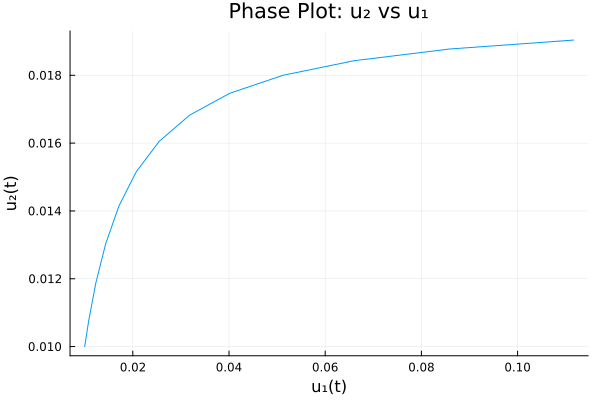

In [49]:
plot(sol[1, :], sol[2, :], xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)


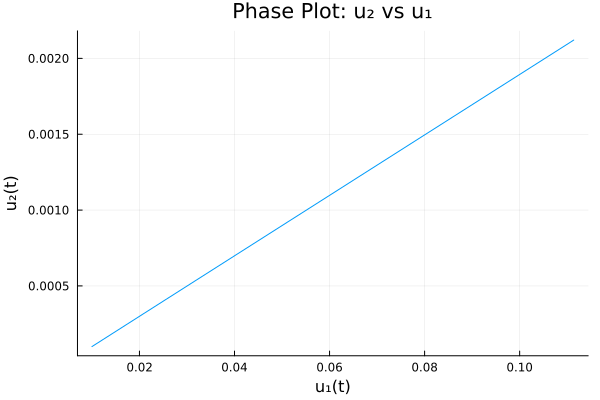

In [50]:
plot(sin.(sol[1, :]) .* cos.(sol[2, :]), sin.(sol[1, :]) .* sin.(sol[2, :]), xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)
